# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segmentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaluation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [41]:
# Q1 (code)
import tomotopy as tp # Used for topic modeling
import little_mallet_wrapper # Used for preparing raw text for topic modeling
import pandas as pd # Used for makiing dataframes
import re #used for regular expressions
from IPython.display import Markdown, display # Allows change in display such as bolded text 
import seaborn as sns # Used to make a lineplot
import matplotlib.pyplot as plt # Used to make a heatmap

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [3]:
# Q2 (code)
trump = pd.read_csv('trump_tweets.csv', sep=',')
sanders = pd.read_csv('sanders_tweets.csv', sep=',')

In [4]:
both = pd.concat([trump,sanders], ignore_index=True)
both.head(4)

,Username,TweetId,Title,Content
0,@realDonaldTrump,822421390125043713,@realDonaldTrump_822421390125043713,It all begins today! I will see you at 11:00 ...
1,@realDonaldTrump,822501803615014918,@realDonaldTrump_822501803615014918,Today we are not merely transferring power fr...
2,@realDonaldTrump,822501939267141634,@realDonaldTrump_822501939267141634,"power from Washington, D.C. and giving it bac..."
3,@realDonaldTrump,822502135233384448,@realDonaldTrump_822502135233384448,What truly matters is not which party control...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [8]:
# Q3 (code)
tweets_df = both['Content']
training_data = []
original_text = []
titles = []
# Iterate over the rows of the dataframe
for index, row in both.iterrows():
    title = row['Title']
    #append the information to the titles list
    titles.append(title)


for tweet in tweets_df:
    # append the original tweets to the original_text list
    original_text.append(tweet)
    #remove punction that is frequent on twitter/ remove users and mentions
    no_punct_tweet = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump|sensanders", '', tweet , flags=re.MULTILINE)
    #process the data to lowercase, remove stopwords and numbers. Then add it to the list training_data
    training_data.append(little_mallet_wrapper.process_string(no_punct_tweet))

In [7]:
# Check to see if the lists you made have the same amount of items
len(original_text), len(training_data), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train an LDA topic model with `tomotopy`

In [14]:
# Q4 (code)
# Number of topics to return
num_topics = 10
# Numer of topic words to print out. I chose 5 words because tweets are short texts than for example articles.
# Because tweets are shorter, they likely contain less words per topic since there is not room to discuss concepts extensively.
num_topic_words = 5

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each tweet to the model, after splitting it up into words
for tweet in training_data:
    model.add_doc(tweet.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.061268890221765
Iteration: 10	Log-likelihood: -8.710442520528074
Iteration: 20	Log-likelihood: -8.521719043453265
Iteration: 30	Log-likelihood: -8.436781452008177
Iteration: 40	Log-likelihood: -8.386283587227702
Iteration: 50	Log-likelihood: -8.356782698741236
Iteration: 60	Log-likelihood: -8.335684445855893
Iteration: 70	Log-likelihood: -8.31372389216494
Iteration: 80	Log-likelihood: -8.303432318608301
Iteration: 90	Log-likelihood: -8.29223650493517


In [113]:
# You can save the model because retraining the model will yield different values
model.save('10_topic_politicians_model.bin')

### Q5. Print out the top words for each topic and manually evaluate their coherence


In [15]:
# Q5a (code)
# Print out the top 5 words for each topic
print("\nTopic Model Results:\n\n")

# Make a list for the topics
topics = []
# Make a list for the words that belong to each topic
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

great total endorsement strong military

✨Topic 1✨

news fake media people would

✨Topic 2✨

NUM tax trump people billion

✨Topic 3✨

biden border china joe democrats

✨Topic 4✨

NUM great thank vote republican

✨Topic 5✨

people must trump american war

✨Topic 6✨

president trump democrats impeachment NUM

✨Topic 7✨

NUM great america president jobs

✨Topic 8✨

NUM health care people workers

✨Topic 9✨

president great today thank trump



#### Q5b (words)
##### Describe what each topic is about. What ideas, values, or situations do these keywords refer to?
+ Topic 0 seems to contain words in favour of the US military such as 'strong'  and 'endorsement' in the same context as the word 'military'
+ Topic 1 seems to refer to the concept of fake news, which Trump uses to refer to the media spreading false information in his view.
+ Topic 2 NUM stands for the usage of numbers, which makes sense in the context of tax and billion. This topic might be about tax cuts Trump implemented during his presidency but it is difficult to be sure. 
+ Topic 3 seems quite random and touches upon 3 topics in US politics; Joe Biden (a Democrat president), the border (likely the one between the US and Mexico) and China (international relations and important trade partner of the US). This topic seems inconclusive
+ Topic 4 could be a call to vote for Republicans in elections. Or thanking the people who voted Republican in the elections. NUM could be related the number of people who did. 
+ Topic 5 seems to be related to a war that Trump might play a role in.
+ Topic 6 is likely related the Democrat efforts to impeach Donald Trump in 2019 or 2021. 
+ Topic 7 could be related to Donald Trump's slogan 'Make America Great Again' and his wish to create more jobs in the US.
+ Topic 8 Could be either related to the COVID-19 outbreak if the tweets are about health care workers, or it could be about health care which has undergone reformation attempts under Trumps' presidency.  
+ Topic 9  Is highly likely about Trump, thanking his supporters. His slogan 'Make America Great Again' containt the word 'great' as found in this topic and Donald Trump himself uses the word frequently as well.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [16]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5302215428324417 
Per Topic: [0.7329644083976745, 0.5411011926829815, 0.5719851434230805, 0.42540399730205536, 0.4562898558098823, 0.5157950393855572, 0.5815345428884029, 0.4380041748285294, 0.5764776259660721, 0.4626594476401806]



In [28]:
# Let's train the model with different settings
# Number of topics to return
num_topics_dif = 40
# Numer of topic words to print out. 
num_topic_words_dif = 5

# Intialize the model
model_2 = tp.LDAModel(k=num_topics_dif)

# Add each tweet to the model, after splitting it up into words
for tweet in training_data:
    model_2.add_doc(tweet.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model_2.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -8.29223650493517
Iteration: 10	Log-likelihood: -8.29223650493517
Iteration: 20	Log-likelihood: -8.29223650493517
Iteration: 30	Log-likelihood: -8.29223650493517
Iteration: 40	Log-likelihood: -8.29223650493517
Iteration: 50	Log-likelihood: -8.29223650493517
Iteration: 60	Log-likelihood: -8.29223650493517
Iteration: 70	Log-likelihood: -8.29223650493517
Iteration: 80	Log-likelihood: -8.29223650493517
Iteration: 90	Log-likelihood: -8.29223650493517


In [29]:
coh = tp.coherence.Coherence(model_2, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5931133206607774 
Per Topic: [0.5196884632110595, 0.5618159294128418, 0.6572501061484217, 0.4981677684932947, 0.5280910894274712, 0.67095245718956, 0.6869465485215187, 0.6705282002687454, 0.6237637132406235, 0.754232382774353]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [221]:
# Q6 (words)
# The initial amount of 10 topics in combination with 10 words per topic yielded results that very difficult to interpret due to the openness of interpretation. 
# Suspecting that this might be due to the 140 character limit of tweets I adjusted the amount of words to 5 and this resulted in more easy-to-interpret topics. 
# The average cohesion of 10 topics with 5 words per topic yielded an average cohesion of 0.5302215428324417 
# I increased the amount of topics to 40 with 5 words per topic (called model_2) and the average cohesion increased to 0.5931133206607774  with approximately 0.06.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

C:\Users\bente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


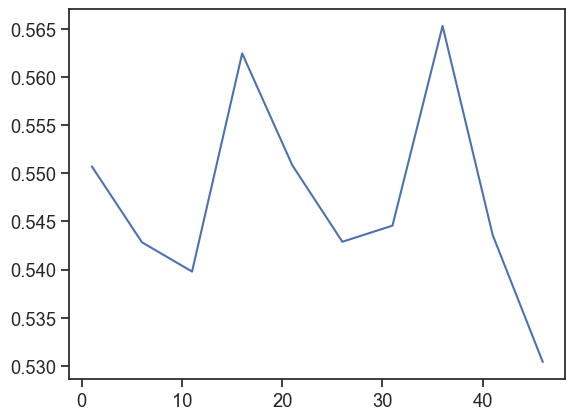

In [30]:
# X1 (code)

# First we create a function to get the average coherence
def coherence_per_topic(num_of_topics):
    
    # Intialize the model
    model_func = tp.LDAModel(k=num_topics)

    # Add each tweet to the model, after splitting it up into words
    for tweet in training_data:
        model_func.add_doc(tweet.strip().split())

    # Iterate over the data 10 times
    iterations = 10
    for i in range(0, 100, iterations):
        model_func.train(iterations)
    #get the coherence for the topic
    coh = tp.coherence.Coherence(model_func, coherence='c_v')
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

    return average_coherence

# Then we create lists for the x-axis(= number of topics in the model) and the y-axis(= average topic coherence)
x_axis = []
y_axis = []
for i in range(1, 50, 5):
    num_of_topics = i
    average_coherence = coherence_per_topic(num_of_topics)
    x_axis.append(num_of_topics)
    y_axis.append(average_coherence)
# Then we plot the axes to see which amount of topics has the best cohesion
sns.lineplot(x = x_axis, y = y_axis);

In [222]:
# My conclusion is that around 15 topics is the best amount of topics considering including more topics also takes more time to load.
# Furthermore, the coherence does not seem to significantly improve when comparing approximately 15 and approximately 35.

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [32]:
# Q7a (code)
# Calculate the topic distributions for all tweets
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [33]:
#To display documents that have the highest possibility to have a certain topic we need to use the get_top_docs() function from Maria Antoniak's Little Mallet Wrapper
def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc:
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [34]:
# Get 5 tweets that are probable to be topic 0
get_top_docs(titles, topic_distributions, topic_index=0, n=5)

### ✨Topic 0✨

great total endorsement strong military



---


✨  
**Topic Probability**: 0.9439176917076111  
**Document**: @realDonaldTrump_1025584530227441665



✨  
**Topic Probability**: 0.9418925642967224  
**Document**: @realDonaldTrump_1228812306437550082



✨  
**Topic Probability**: 0.9418925642967224  
**Document**: @realDonaldTrump_1044342304155348995



✨  
**Topic Probability**: 0.9397157430648804  
**Document**: @realDonaldTrump_1308247523170160640



✨  
**Topic Probability**: 0.9397157430648804  
**Document**: @realDonaldTrump_1298077572685803521



In [35]:
# Let's try again for topic 1
get_top_docs(titles, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

news fake media people would



---


✨  
**Topic Probability**: 0.9521549940109253  
**Document**: @realDonaldTrump_982218660788883457



✨  
**Topic Probability**: 0.9521549940109253  
**Document**: @realDonaldTrump_1287949070405787648



✨  
**Topic Probability**: 0.9409821033477783  
**Document**: @realDonaldTrump_1013146187510243328



✨  
**Topic Probability**: 0.9331800937652588  
**Document**: @realDonaldTrump_1235796639685791744



✨  
**Topic Probability**: 0.9331800937652588  
**Document**: @realDonaldTrump_1028262012332240901



In [36]:
# Finally, let's try for topic 9
get_top_docs(titles, topic_distributions, topic_index=9, n=5)

### ✨Topic 9✨

president great today thank trump



---


✨  
**Topic Probability**: 0.9404828548431396  
**Document**: @realDonaldTrump_1129136708220477440



✨  
**Topic Probability**: 0.9380726218223572  
**Document**: @realDonaldTrump_1129102710580621312



✨  
**Topic Probability**: 0.9326148629188538  
**Document**: @realDonaldTrump_986395361815166981



✨  
**Topic Probability**: 0.9261021614074707  
**Document**: @realDonaldTrump_937309279257792512



✨  
**Topic Probability**: 0.922349750995636  
**Document**: @realDonaldTrump_1212550610429587456



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [38]:
# Q7b (words)
# The top 5 tweets for topic 0, 1 and 9 are all by Donald Trump.
# Topic 0 seems to be about endorsement of the US military which is likely a more right-wing topic
# Topic 1 contains the words; news fake media people would. The words fake news and fake media tend to be more representative of Donald Trump.
# Trump has called news he does not agree with fake news before many times and it is unsurprising that shows up in his tweets.
# Topic 9 contains the words; president great today thank trump. As mentioned before, the word 'great' is frequent in Trump's vocabulary. 

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [42]:
# Crete a sample of tweets for which we need the following library
from random import sample
target_labels = sample(titles,100)

In [43]:
# Q8 (code)
# Create a heatmap using the random sample

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

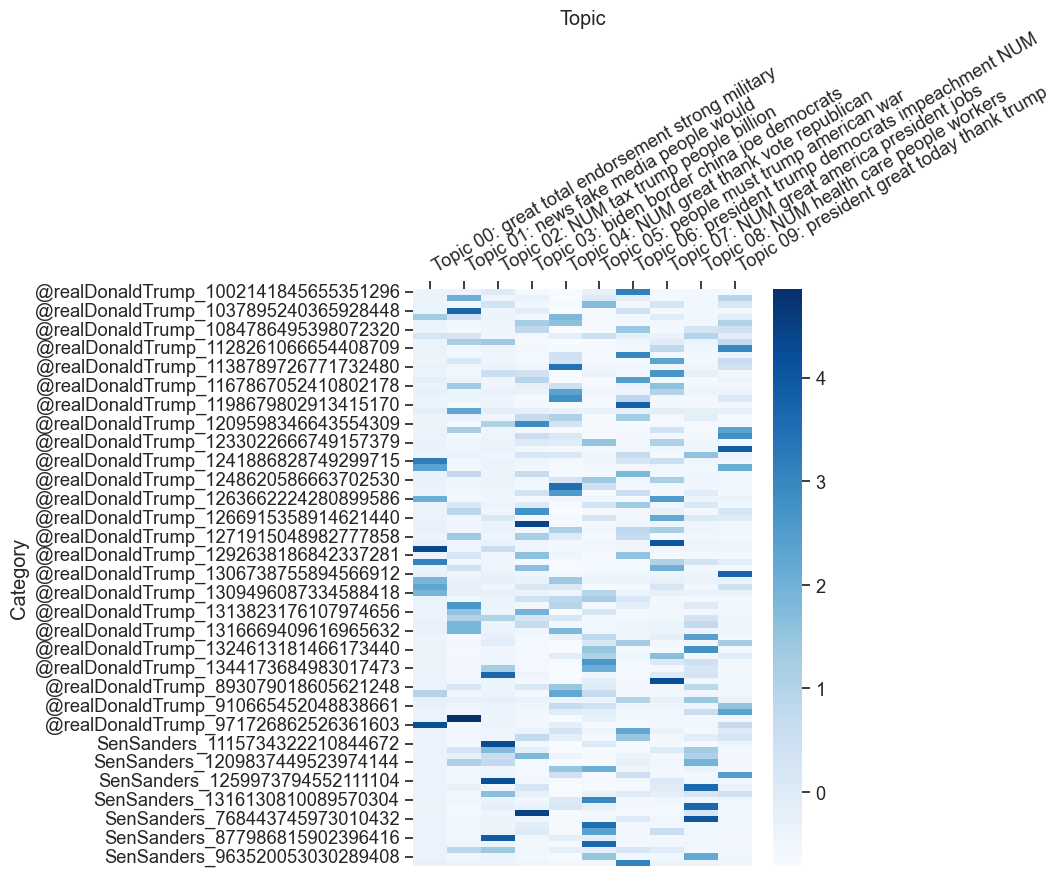

In [44]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(10,9))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [50]:
# Q9 (words)
# Firstly, Trumps' tweets are overly represented. 
print(f'The amount of tweets by Trump are {len(trump)} and the amount of tweets by Sanders are {len(sanders)}')
# Secondly, Whenever there is a high probability for topics for one politician, the probability seems to be lower for the other one and vice versa.
# Topic 6 seems to have some high probability for both politicians but it is likely Sanders would also tweet about Trumps' impeachment as that gives room for a new candidate,
# which is important to both right-wing and left-wing politicians.

The amount of tweets by Trump are 23075 and the amount of tweets by Sanders are 7296


### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [51]:
# X2 (code)
# First we get all the tweets by Trump
trump_tweets = [title for title in titles if '@realDonaldTrump' in title]
# Then we sample 50 random tweets out of Trumps' tweets
trump_50 = sample(trump_tweets, 50)
# Then we get all the tweets by Sanders
sanders_tweets = [title for title in titles if 'SenSanders' in title]
# Then we sample 50 random tweets out of Sanders' tweets
sanders_50 = sample(sanders_tweets, 50)
#Then we combine the tweets
combined_tweets = trump_50 + sanders_50

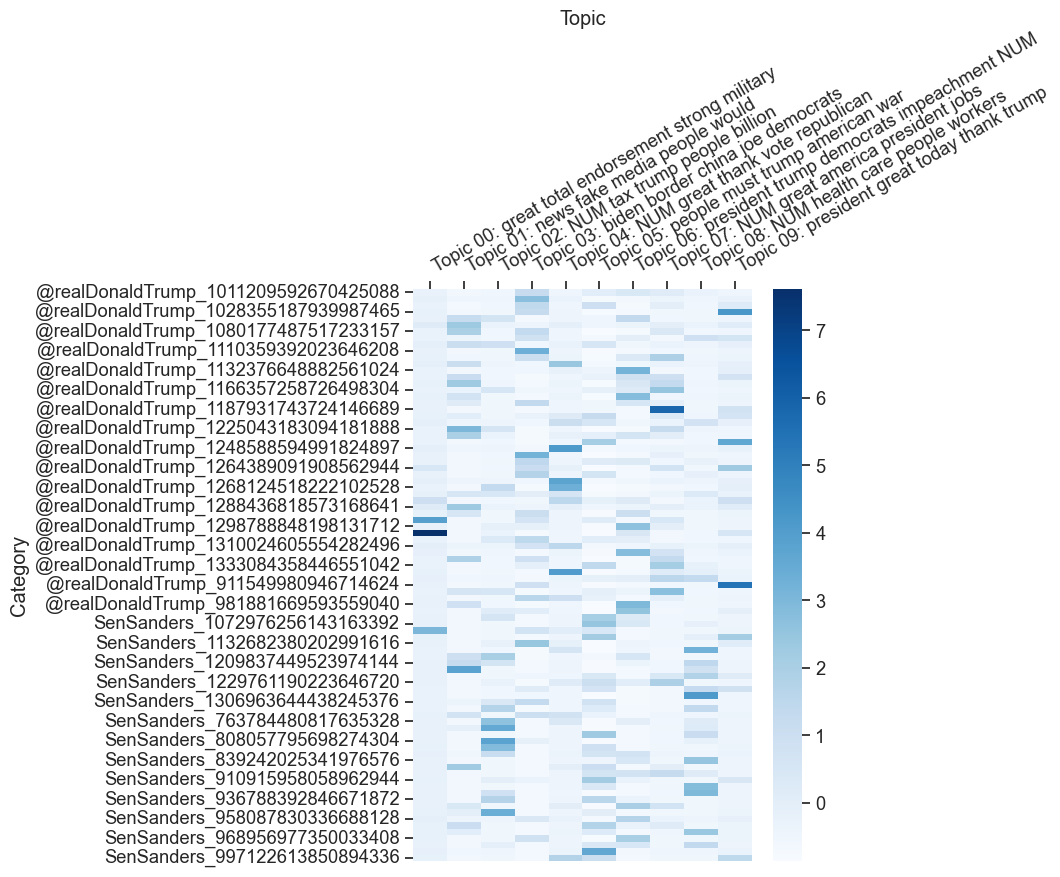

In [52]:
# Then we make a heatmap of the 50/50 sample
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  #This time the target_labels come from the sample of 50 Trump tweets and 50 Sanders tweets
                                  target_labels=combined_tweets,
                                  color_map = 'Blues',
                                 dim=(10,9))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [208]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)
# Sorry but this explanation was not entirely clear to me.
# Here I attempt to make a dataframe of all tweets, then get the average of each politician for each topic and then make a heatmap of that.
topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'Title': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')

In [209]:
# We save our results as a dataframe
df.to_csv('Topic-Distributions.csv', encoding='utf-8', index=False)

In [210]:
df.head()

,Title,Topic 0 great total endorsement strong,Topic 1 news fake media people,Topic 2 NUM tax trump people,Topic 3 biden border china joe,Topic 4 NUM great thank vote,Topic 5 people must trump american,Topic 6 president trump democrats impeachment,Topic 7 NUM great america president,Topic 8 NUM health care people,Topic 9 president great today thank
0,@realDonaldTrump_822421390125043713,0.007201,0.015139,0.182387,0.016191,0.014998,0.275339,0.444355,0.017300,0.013046,0.014042
1,@realDonaldTrump_822501803615014918,0.006634,0.013947,0.010456,0.014915,0.013816,0.017304,0.566911,0.252280,0.012019,0.091717
2,@realDonaldTrump_822501939267141634,0.009687,0.020364,0.130297,0.021778,0.020174,0.255326,0.022549,0.368360,0.017548,0.133918
3,@realDonaldTrump_822502135233384448,0.007875,0.016555,0.012412,0.111220,0.203432,0.488119,0.018331,0.018918,0.107782,0.015356
4,@realDonaldTrump_822502270503972872,0.007875,0.016555,0.012412,0.017705,0.016401,0.020541,0.018331,0.860559,0.014266,0.015356


In [223]:
# Now I make a new column: Politician to identify Trump and Sanders tweets
for index, row in df.iterrows():
    title = row['Title']
    if 'DonaldTrump' in title:
        df.loc[index, 'Politician'] = 'Trump'
    elif 'Sanders' in title:
        df.loc[index, 'Politician'] = 'Sanders'

In [224]:
df.head()

,Title,Topic 0 great total endorsement strong,Topic 1 news fake media people,Topic 2 NUM tax trump people,Topic 3 biden border china joe,Topic 4 NUM great thank vote,Topic 5 people must trump american,Topic 6 president trump democrats impeachment,Topic 7 NUM great america president,Topic 8 NUM health care people,Topic 9 president great today thank,Politician
0,@realDonaldTrump_822421390125043713,0.007201,0.015139,0.182387,0.016191,0.014998,0.275339,0.444355,0.017300,0.013046,0.014042,Trump
1,@realDonaldTrump_822501803615014918,0.006634,0.013947,0.010456,0.014915,0.013816,0.017304,0.566911,0.252280,0.012019,0.091717,Trump
2,@realDonaldTrump_822501939267141634,0.009687,0.020364,0.130297,0.021778,0.020174,0.255326,0.022549,0.368360,0.017548,0.133918,Trump
3,@realDonaldTrump_822502135233384448,0.007875,0.016555,0.012412,0.111220,0.203432,0.488119,0.018331,0.018918,0.107782,0.015356,Trump
4,@realDonaldTrump_822502270503972872,0.007875,0.016555,0.012412,0.017705,0.016401,0.020541,0.018331,0.860559,0.014266,0.015356,Trump


In [226]:
#I get rid of the Title column now that I do not need it anymore
politician_probability_df = df.drop(columns=['Title'])
politician_probability_df.head()

,Topic 0 great total endorsement strong,Topic 1 news fake media people,Topic 2 NUM tax trump people,Topic 3 biden border china joe,Topic 4 NUM great thank vote,Topic 5 people must trump american,Topic 6 president trump democrats impeachment,Topic 7 NUM great america president,Topic 8 NUM health care people,Topic 9 president great today thank,Politician
0,0.007201,0.015139,0.182387,0.016191,0.014998,0.275339,0.444355,0.017300,0.013046,0.014042,Trump
1,0.006634,0.013947,0.010456,0.014915,0.013816,0.017304,0.566911,0.252280,0.012019,0.091717,Trump
2,0.009687,0.020364,0.130297,0.021778,0.020174,0.255326,0.022549,0.368360,0.017548,0.133918,Trump
3,0.007875,0.016555,0.012412,0.111220,0.203432,0.488119,0.018331,0.018918,0.107782,0.015356,Trump
4,0.007875,0.016555,0.012412,0.017705,0.016401,0.020541,0.018331,0.860559,0.014266,0.015356,Trump


In [229]:
# Now I group the dataframe by the presidents and get the mean.
# I get the mean because all the tweets are considered but I do not visualise thousends of tweets this way.
mean_politician_probability_df = politician_probability_df.groupby('Politician').mean()
mean_politician_probability_df.head()

,Topic 0 great total endorsement strong,Topic 1 news fake media people,Topic 2 NUM tax trump people,Topic 3 biden border china joe,Topic 4 NUM great thank vote,Topic 5 people must trump american,Topic 6 president trump democrats impeachment,Topic 7 NUM great america president,Topic 8 NUM health care people,Topic 9 president great today thank
Politician,,,,,,,,,,
Sanders,0.026405,0.051813,0.199935,0.058640,0.053999,0.238433,0.059210,0.059727,0.211872,0.039966
Trump,0.058810,0.110694,0.052136,0.117908,0.116427,0.094724,0.144052,0.127536,0.066471,0.111241


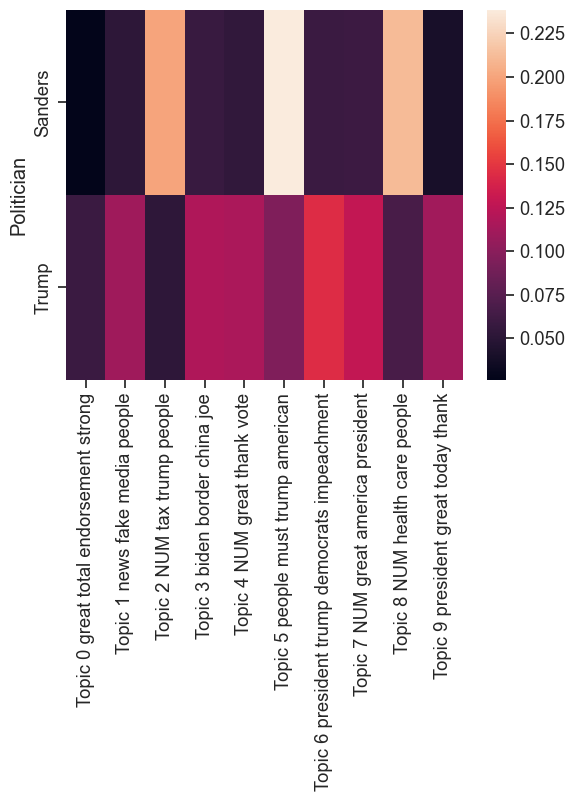

In [231]:
# The last step is making a heatmap
sns.heatmap(mean_politician_probability_df);

In [232]:
# Unsurprisingly topic 0 seems to be a little bit more discussed by Trump than Sanders. 
# Topic 1 about fake news is unsurpisingly more discussed by Trump.
# As speculated before topic 2 might be about tax-cuts by Trump, this visualisation suggests, from the perspective of Sanders. 
# Topic 5 is more discussed by Sanders than Trump. Sadly the topic itself is not very precise. 
# Topic 8 is about health care and seems to be a more democratic topic
# Furthermore, the topics that belonged to Trump more so than to Sanders were; 3, 4, 6, 7 and 9.